In [1]:
script = False

import numpy as np
import pandas as pd

from PIL import Image, ImageOps
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def make_plot_all(objects, data):
    for i in range(len(objects)):
        #if(i==500): break
        if(i%4 == 0):
            plt.figure(figsize=(12,8))
            for j in range(4):
                if(i+j > len(objects)-1): break
                plt.subplot(1,4,j+1)
                print(data['COADD_OBJECT_ID'].iloc[i+j])
                tmp_title = '{:.3f}'.format(data['Prob'].iloc[i+j])
                plt.title(tmp_title)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            if(script):
                plt.savefig(title+'_'+str(i+j), bbox_inches='tight')
                plt.close()
            else: 
                plt.show()

In [3]:
def explore(name, prob_lim):
    print(name)
    filename = name
    path = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn/Y6_detections/'
    file_path = path + filename
    hdu_list = fits.open(file_path)
    images = hdu_list[1].data
    data = pd.DataFrame(hdu_list[2].data)
    data = data.astype({'COADD_OBJECT_ID': int, 'Prob': float})
    hdu_list.close()
    
    data = data[data['Prob'] > prob_lim]
    images = images[data.index.tolist()]
    print(len(data))
    make_plot_all(images, data)
    

DES0000-0207.fits
7
1031868085
1031883758
1033597570
1031859891


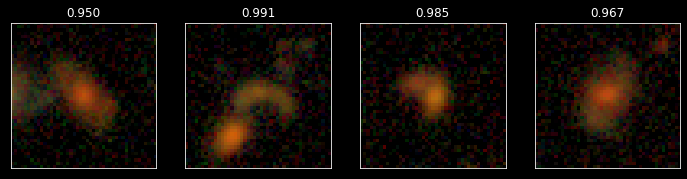

1031851454
1031856513
1031879823


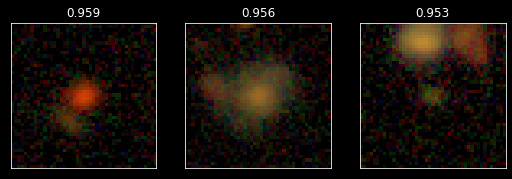

DES0118-3457.fits
4
1156910799
1156917735
1156917100
1156905371


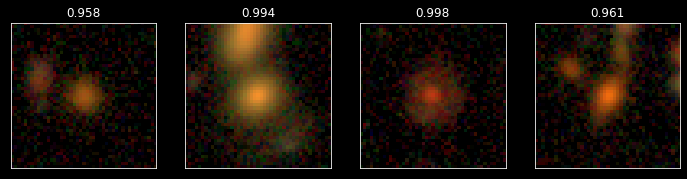

DES0220+0252.fits
20
1267142825
1267125921
1267095135
1267092258


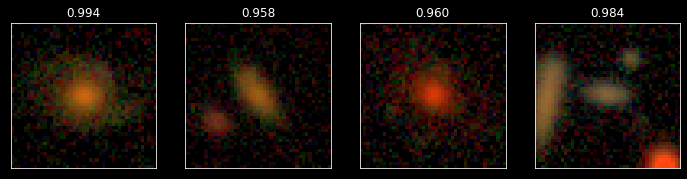

1267145307
1267138006
1267125067
1267141418


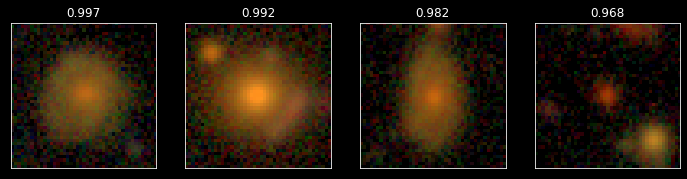

1267109988
1267110211
1267110367
1267146382


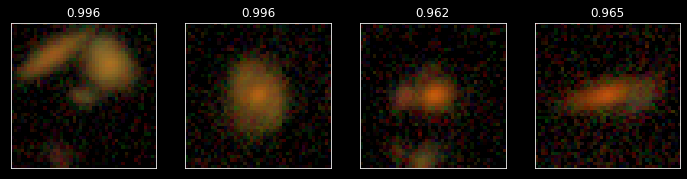

1267124982
1267093356
1267123124
1267143701


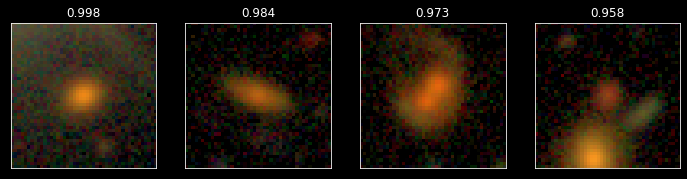

1267100969
1267109760
1267111711
1267109355


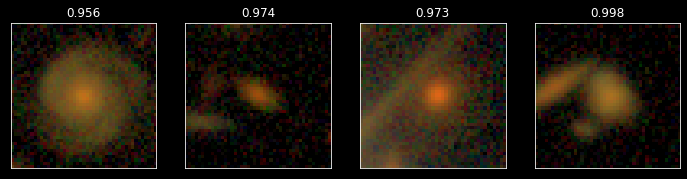

DES0326-2041.fits
11
1385454650
1385450491
1385459442
1385481145


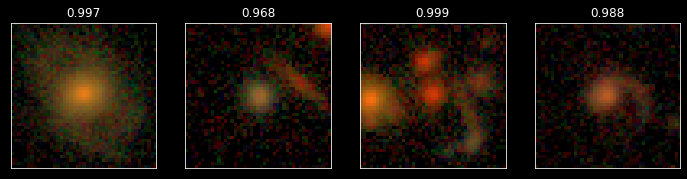

1385460283
1385457667
1385455187
1385487454


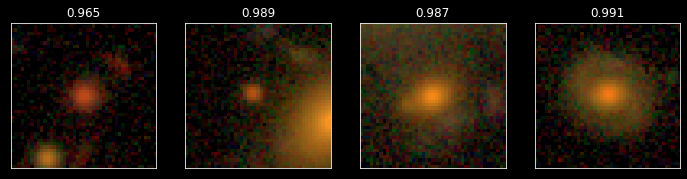

1385637969
1385464299
1385502407


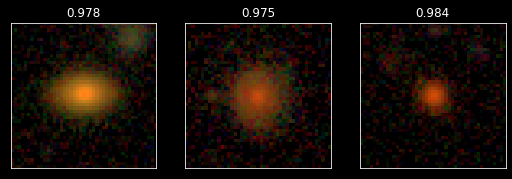

DES0457-3206.fits
16
1518642310
1518339292
1518352931
1518360298


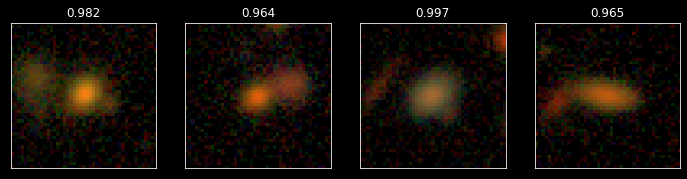

1518641530
1518638136
1518654811
1518645289


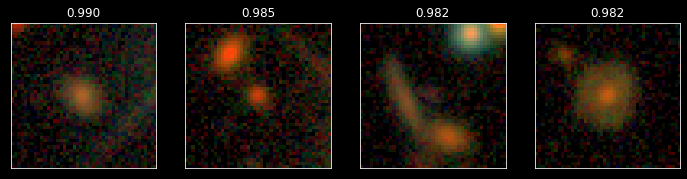

1518645880
1518643004
1518342024
1518643573


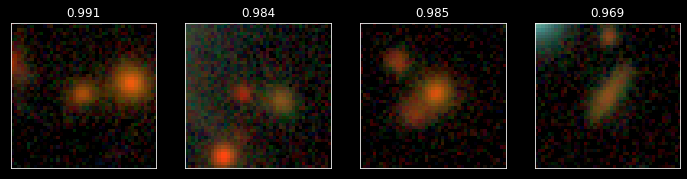

1518337817
1518648894
1518647326
1518648007


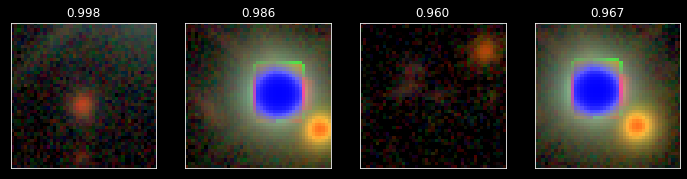

DES2108-4831.fits
12
908008988
907975861
908008965
908034549


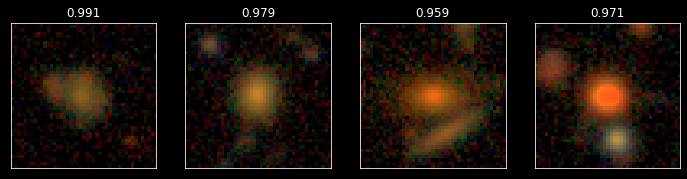

908018938
908000058
907998931
908002813


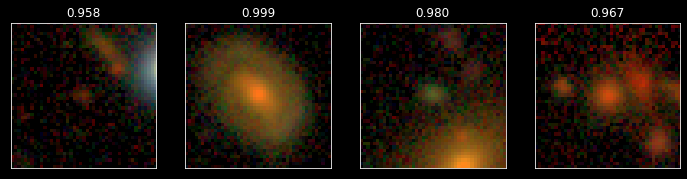

907994888
908004981
908036585
908018150


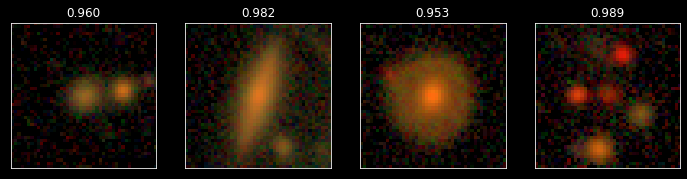

DES0000+0209.fits
22
1033047809
1033335235
1033333725
1033344627


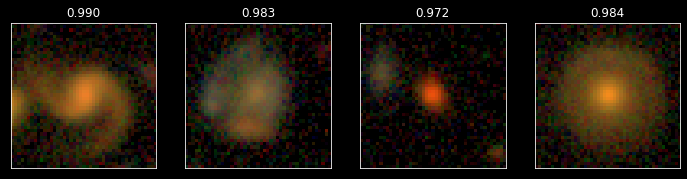

1033335225
1033059282
1033045757
1033343880


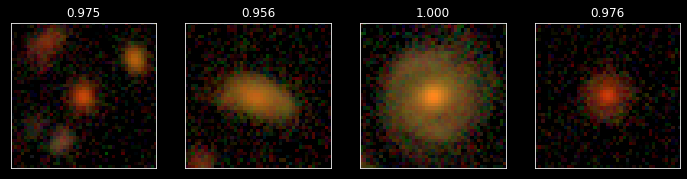

1033041962
1033335307
1033335032
1033333417


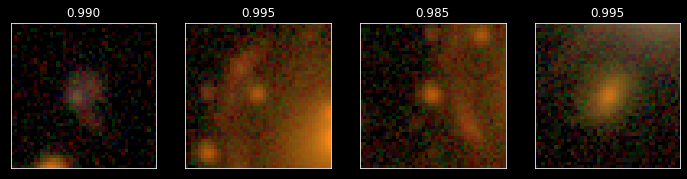

1033047553
1033334228
1033072677
1033052531


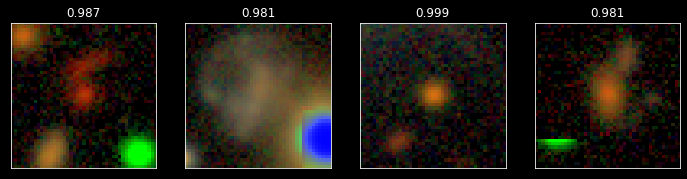

1033341447
1033360174
1033051939
1033336697


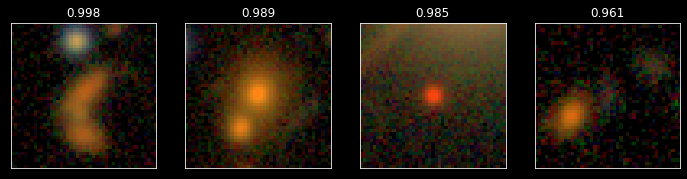

1033057468
1033046087


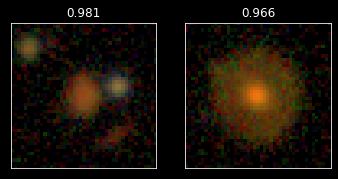

DES0118-3540.fits
14
1157920503
1157917113
1157931117
1157888541


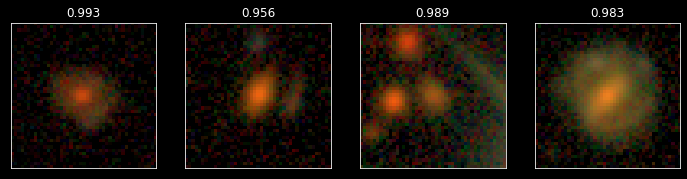

1157882686
1157922578
1157883942
1157891062


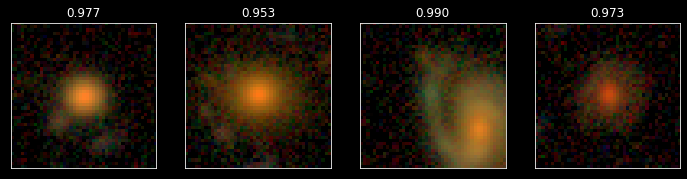

1157884357
1157881981
1157885120
1157875163


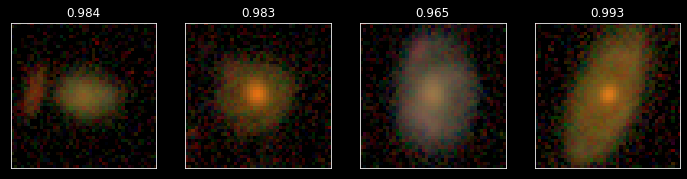

1157885667
1157877669


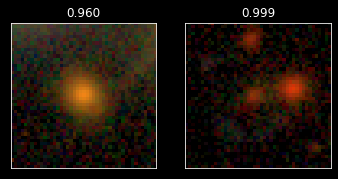

DES0220-0333.fits
12
1266699937
1266742963
1266712560
1266711550


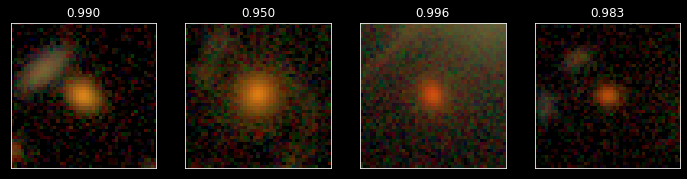

1266715439
1266710421
1266691060
1266691769


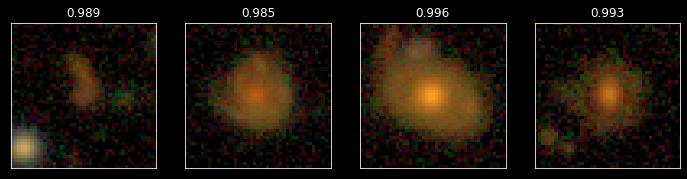

1266684630
1266734126
1266715443
1266732458


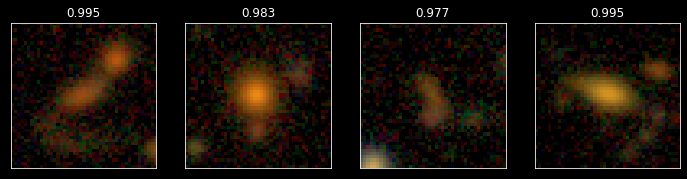

DES0326-2832.fits
15
1386604011
1386582120
1386604785
1386563818


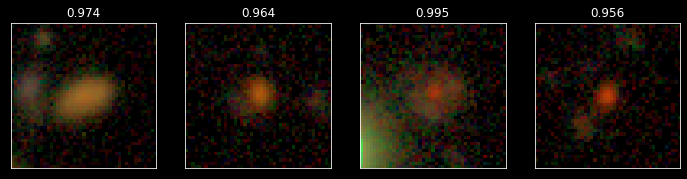

1386611754
1386576925
1386571941
1386577928


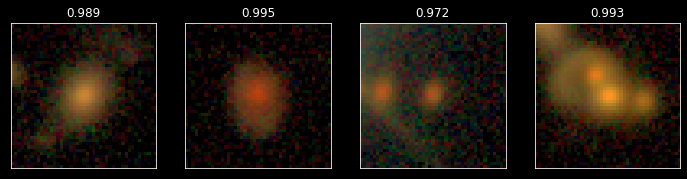

1386588571
1386606351
1386614634
1386599366


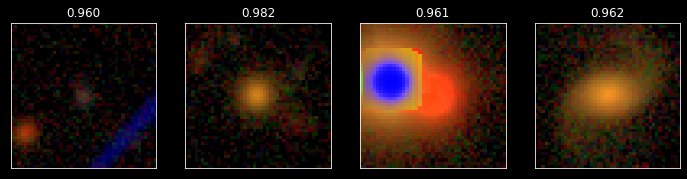

1386588568
1386598315
1386559633


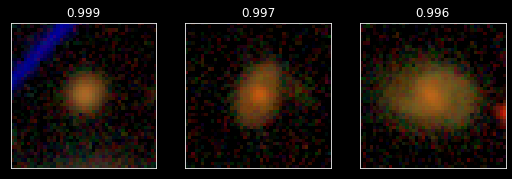

DES0457-3332.fits
8
1518526197
1518089948
1518497743
1518498363


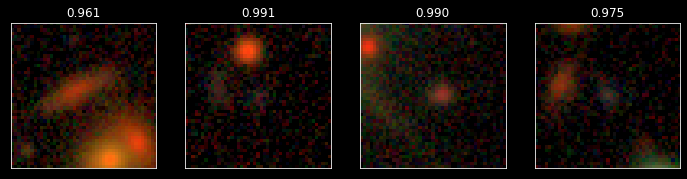

1518525906
1518526193
1518096848
1518096888


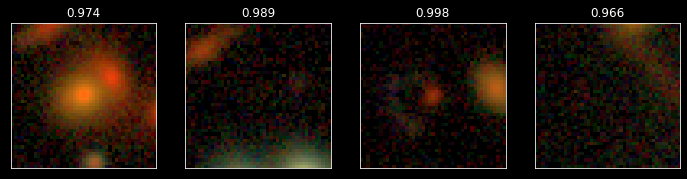

DES2108-4957.fits
15
908611212
908618891
908635746
908661930


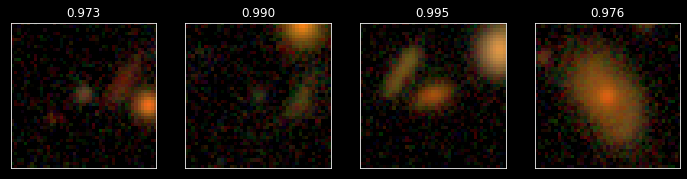

908615821
908662415
908596224
908611095


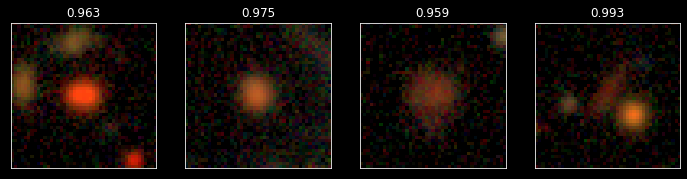

908593503
908594364
908600297
908591185


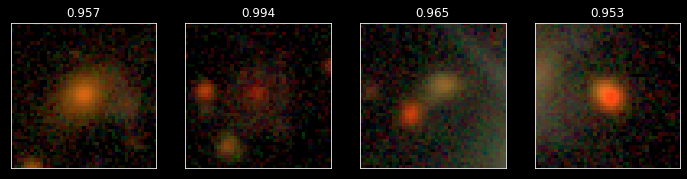

908653208
908611103
908629175


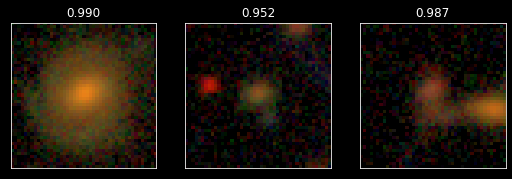

DES0000-0250.fits
8
1032384140
1032373898
1032358118
1032350671


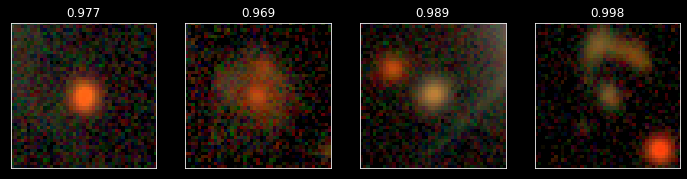

1032342836
1032369668
1032342992
1032371574


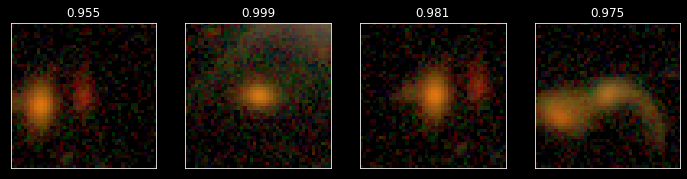

DES0118-3623.fits
12
1158942062
1158898623
1158928042
1158930258


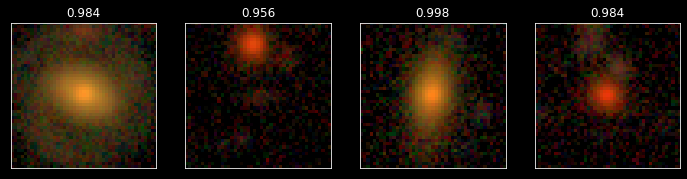

1158898534
1158951859
1158899118
1158899559


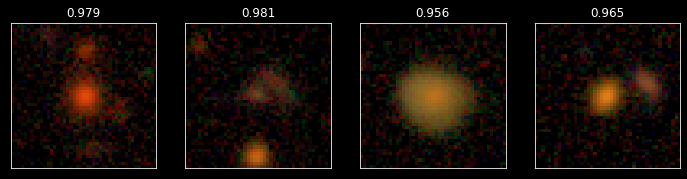

1158922060
1158902288
1158938614
1158905750


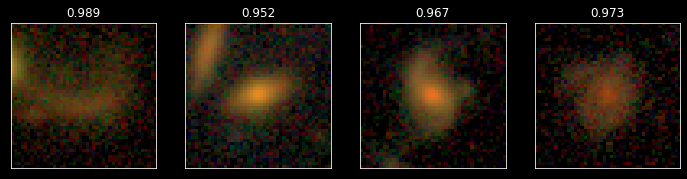

DES0220+0335.fits
11
1267342016
1267367366
1267072717
1267381698


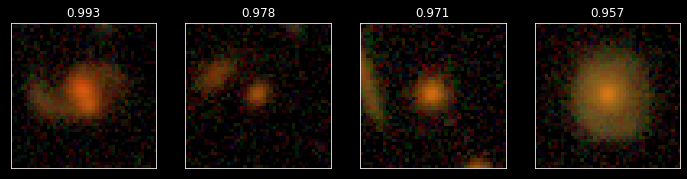

1267367859
1267364552
1267358281
1267381519


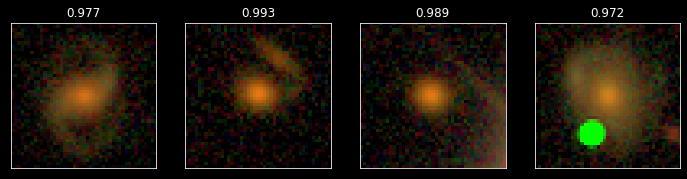

1267375538
1267347846
1267070169


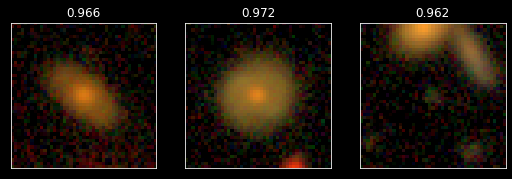

DES0326-2915.fits
12
1385818848
1385827411
1385842046
1385827484


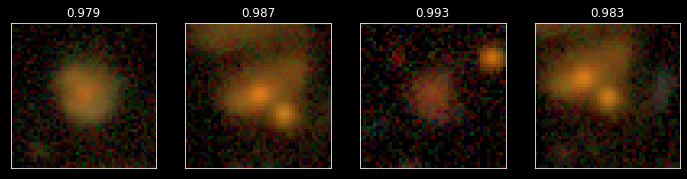

1385833501
1385834160
1385825565
1385859631


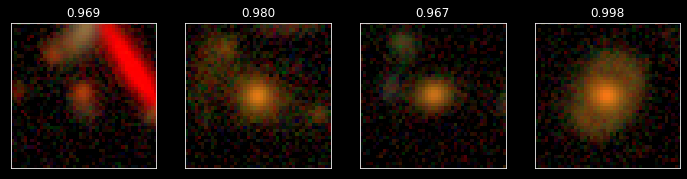

1385808308
1385803649
1385807806
1385850122


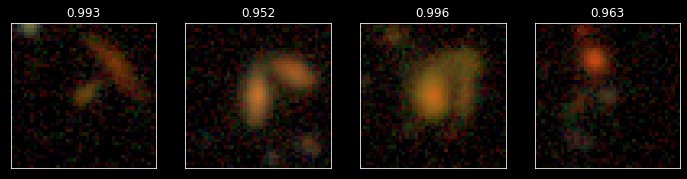

DES0457-3457.fits
11
1519255955
1519230176
1519219019
1519229917


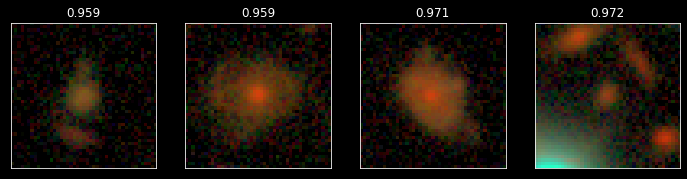

1519252708
1519254137
1519257822
1519230285


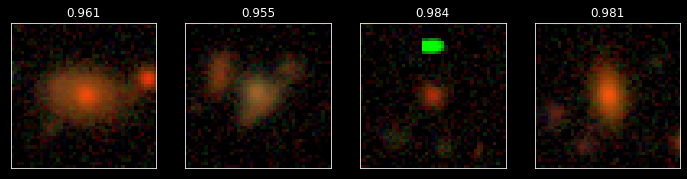

1519264722
1519225965
1519205961


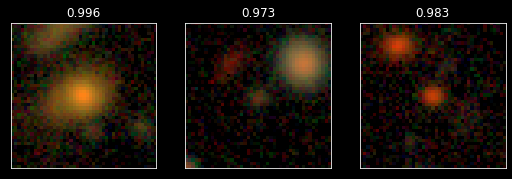

DES2108-5331.fits
11
907595318
907598614
907614511
907577071


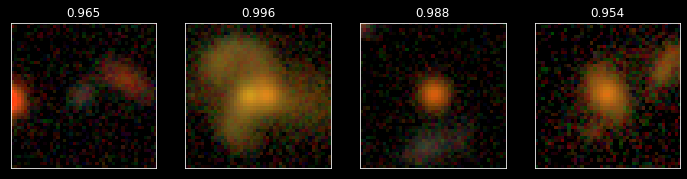

907621744
907614480
907578356
907574792


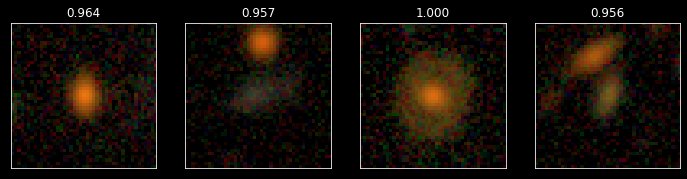

907623579
907618733
907613762


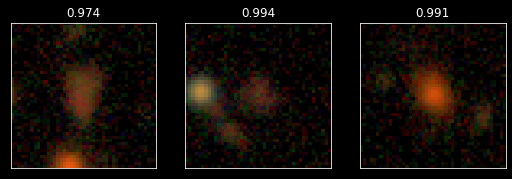

In [5]:
data = pd.read_csv('condor_files/tiles_pd.csv')
for index, row in data.iterrows():
    name = row['tile']
    prob_lim = 0.949
    explore(name, prob_lim)